__1. Write a python program which searches all the product under a particular product vertical
from www.amazon.in. The product verticals to be searched will be taken as input from user.__


In [9]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [10]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")

In [11]:
# opening homepage of Amazon
url = "https://www.amazon.in/"
driver.get(url)

In [12]:
# locating search_bar by id
searchFor = input('Enter the product to be searched : ')
search_bar = driver.find_element_by_id("twotabsearchtextbox")
search_bar.send_keys(searchFor)

Enter the product to be searched : washing machines


In [13]:
# locating search button and click to start search
search_button = driver.find_element_by_xpath('//div[@class="nav-search-submit nav-sprite"]/span/input')
search_button.click()

__2. . In the above question, now scrape the following details of each product listed in first 3 pages
of your search results and save it in a data frame and csv. In case if any product vertical has
less than 3 pages in search results then scrape all the products available under that product
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details"
and “Product URL”. In case, if any of the details are missing for any of the product then
replace it by “-“.__

In [14]:
brandName= []

ratings=[]


Return=[]

Availability=[]
otherDetails=[]


In [15]:
# Brand and Productname

prod = driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base a-text-normal"]')
nameOfProduct=[]
for i in prod:
    nameOfProduct.append(i.text.replace("\n",""))
nameOfProduct

['Amazon Basics 6.5 Kg Fully Automatic Top Loading Washing Machine, Grey',
 'Samsung 6.5 kg Fully-Automatic Top Loading Washing Machine (WA65A4002VS/TL, Imperial Silver, Center Jet Technology)',
 'Samsung 6.5 kg Fully-Automatic Top Loading Washing Machine (WA65A4002VS/TL, Imperial Silver, Center Jet Technology)',
 'Whirlpool 7 Kg 5 Star Semi-Automatic Top Loading Washing Machine (SUPERB ATOM 7.0, Grey Dazzle, TurboScrub Technology)',
 'Whirlpool 7 Kg 5 Star Royal Fully-Automatic Top Loading Washing Machine (WHITEMAGIC ROYAL 7.0 GENX, Grey, Hard Water Wash)',
 'Whirlpool 6.5 Kg 5 Star Fully-Automatic Top Loading Washing Machine with In-Built Heater (STAINWASH PRO H 6.5, Shiny Grey)',
 'Samsung 6.5 Kg Inverter Fully-Automatic Top Loading Washing Machine (WA65T4262GG/TL, Light Grey,wobble technology)',
 'Samsung 7.2 kg Semi-Automatic Top Loading Washing Machine (WT725QPNDMPXTL, White and Blue, Center Jet Pulsator)',
 'LG 7 Kg 4 Star Semi-Automatic Top Loading Washing Machine (P7020NGAY, D

In [18]:
# price
prices=[]
price = driver.find_elements_by_xpath('//span[@class="a-price-whole"]')

for i in price:
    prices.append(i.text)
prices

[<selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="191922b5-24d8-4ead-b5d8-c7432fa767fb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="4c496e67-289c-4195-a8c0-5c179d590bef")>,
 <selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="e583d671-2511-4b79-b5dc-aade9a9355c0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="1e55ba1c-4dfd-4738-9259-e442b6abd034")>,
 <selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="d392a9cd-df8b-4354-b07b-29ada2036102")>,
 <selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="8478fa2e-5c73-4cc5-bf64-8e15e1380d2b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="adc9b49e8692b72c520feb185c933dc0", element="1a7f339c-2b3c-4814-afe8-41

In [26]:
# Number of rating
numberOfRating=[]
NoRating = driver.find_elements_by_xpath('//span[@class="a-size-base"]')

for i in NoRating:
    numberOfRating.append(i.text.replace("\n",""))

numberOfRating

['1',
 '20,289',
 '20,289',
 '6,370',
 '122',
 '433',
 '119',
 '851',
 '',
 '540',
 '791',
 '396',
 '',
 '',
 '913',
 '2,375',
 '1,349',
 '2,112',
 '1,692',
 '913',
 '1,577',
 '772',
 '1,099',
 '1',
 '3,128',
 '1,979',
 '1',
 '7',
 '4',
 '2,161',
 '1,356']

In [27]:

# expected delivery
expectedDel=[]
deli = driver.find_elements_by_xpath('//span[@class="a-text-bold"]')

for i in deli:
    expectedDel.append(i.text)
expectedDel

['Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Friday, July 30',
 'Tue, 27 Jul, 7:00 am - 9:00 pm',
 'Tue, 27 Jul, 7:00 am - 9:00 pm']

In [25]:
# Scrap Image URl
img_url =[]
url = driver.find_elements_by_xpath('//img[@class="s-image"]')
for i in url:
    img_url.append(i.get_attribute("src"))
    
img_url

['https://m.media-amazon.com/images/I/51rG6Q6C-jS._AC_UY218_.jpg',
 'https://m.media-amazon.com/images/I/51QmQjHQASL._AC_UY218_.jpg',
 'https://m.media-amazon.com/images/I/51QmQjHQASL._AC_UY218_.jpg',
 'https://m.media-amazon.com/images/I/81Qqj2C2RzL._AC_UY218_.jpg',
 'https://m.media-amazon.com/images/I/61j25i+2K7L._AC_UY218_.jpg',
 'https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/777002fa-4253-41f0-a7e8-30db48825e28._CR0,0,500,500_SX50_._TTW_.jpg',
 'https://m.media-amazon.com/images/I/815T7SwcWfL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/713Pw4P8qwL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/51-aWIcS4iS._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/81x68FHUBhL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/81CKlLPbDIL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/810-NkbN1OL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/61LswQ5hZAL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71pVSyDJD9L._AC

In [50]:
# checking the lenghths of each list before creating the dataframe.

print(len(nameOfProduct),len(prices),len(expectedDel),len(img_url))

23 60 23 31


__3. Write a python program to access the search bar and search button on images.google.com and
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.__

In [58]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")

In [59]:
# opening homepage of Google
url = "https://images.google.com/"
driver.get(url)

In [60]:
searchBar = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
searchBar.send_keys("fruits")

In [61]:
# locating search button and click to start search
search_button = driver.find_element_by_xpath('//button[@class="Tg7LZd"]')
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSt0K1iLAfz0W2NeZk0OW_Orah2AlvzURw8Tw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4WiglVrDx69oghAW7W8Al-26g&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
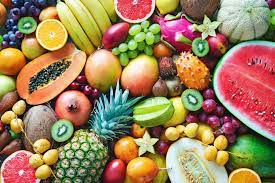
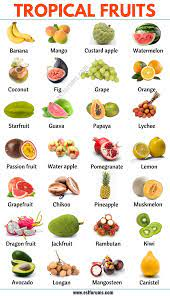
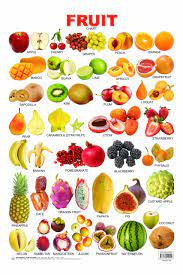
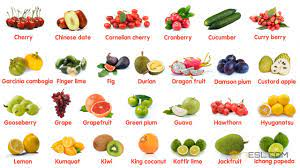
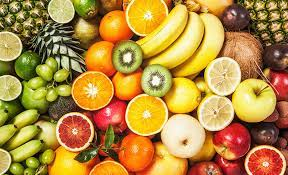
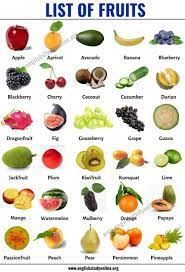
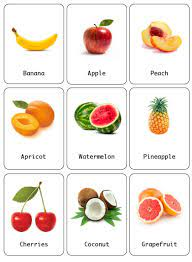
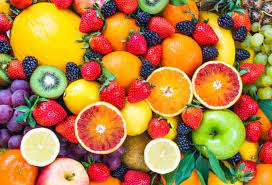
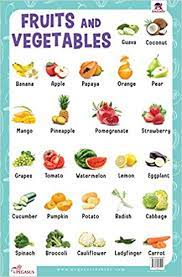
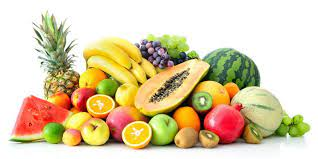
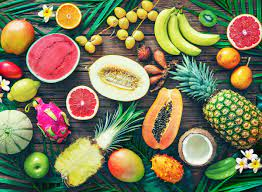
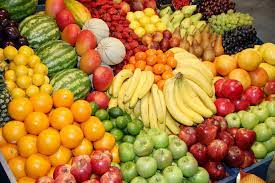
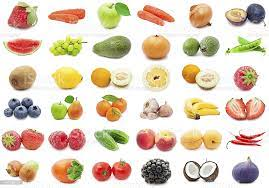
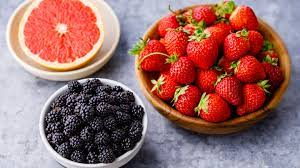
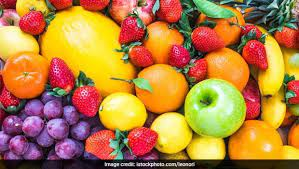
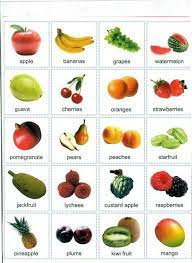
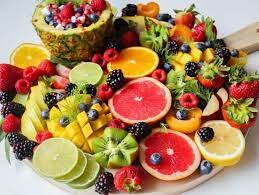
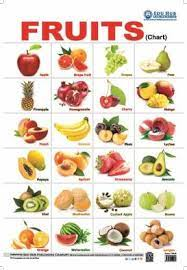
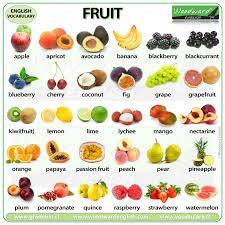
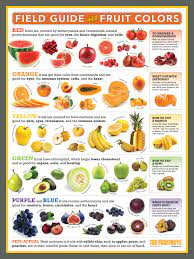

In [69]:
img_url =[]
url = driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
for i in url:
    img_url.append(i.get_attribute("src"))
    
img_url

__4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.__

In [75]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")

In [76]:
# opening homepage of Google
url = "https://www.flipkart.com/"
driver.get(url)

In [87]:
# fetching input from user
mob = input("Enter which mobile phone you would like to see : ")

Enter which mobile phone you would like to see : POCO X3 Pro


In [83]:
searchBar = driver.find_element_by_class_name("_3704LK")
searchBar

<selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="37ec0c63-7966-49c3-810b-d63fcc32f19a")>

In [84]:
searchBar.send_keys(mob)

In [85]:
searchButton = driver.find_element_by_class_name("L0Z3Pu")

In [86]:
searchButton.click()

In [88]:
prod = driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
prod

[<selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="c91d0d46-3686-42e0-b14c-6fe210ba7668")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="2acee73e-aec5-407f-84f6-df1b3758f0e1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="5b130c71-e233-4499-83af-ce82cbfd7c26")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="3e5a8c93-2df4-4c84-a3c4-87ea2a456202")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="25c8ba2b-b239-406a-9357-6b9e0633cfbb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6a0425d6ac008169fbe561ee6cc8ce29", element="4bdee2e0-a65c-484f-aad2-a0b7988a6eae")>]

”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”

In [132]:
name =[]
for i in prod:
    name.append(i.text.split("(")[0])
name

['POCO X3 Pro ',
 'POCO X3 Pro ',
 'POCO X3 Pro ',
 'POCO X3 Pro ',
 'POCO X3 Pro ',
 'POCO X3 Pro ']

In [93]:
# Brand name
bname = driver.find_elements_by_xpath('//div[@class="_3879cV"]')

Brandname =[]
for i in bname[2:3]:
    Brandname.append(i.text)
Brandname

['POCO']

In [101]:
# color by making use of Regular Expression, as theya re in the bracket only.
import re

color = []
ram=[]
for i in name:
    try:
        found = re.search('\((.+?)\)', i).group(1)
        color.append(found.split(',')[0])
        rom.append(found.split(',')[1])
        
    except AttributeError:
        found = '-' 
color
    

['Golden Bronze',
 'Graphite Black',
 'Steel Blue',
 'Steel Blue',
 'Graphite Black',
 'Golden Bronze']

In [102]:
rom

[' 128 GB', ' 128 GB', ' 128 GB', ' 128 GB', ' 128 GB', ' 128 GB']

In [112]:
RAM=[]
ROM=[]
ram = driver.find_elements_by_xpath('//li[@class="rgWa7D"]')
for i in ram[0::7]:
    RAM.append(i.text.split('|')[0])
    ROM.append(i.text.split('|')[1])
    
ROM

[' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ']

In [113]:
RAM

['6 GB RAM ', '6 GB RAM ', '6 GB RAM ', '8 GB RAM ', '8 GB RAM ', '8 GB RAM ']

In [116]:
#display size
display=[]
for i in ram[1::7]:
    display.append(i.text)
display

['16.94 cm (6.67 inch) Full HD+ Display',
 '16.94 cm (6.67 inch) Full HD+ Display',
 '16.94 cm (6.67 inch) Full HD+ Display',
 '16.94 cm (6.67 inch) Full HD+ Display',
 '16.94 cm (6.67 inch) Full HD+ Display',
 '16.94 cm (6.67 inch) Full HD+ Display']

In [119]:
#camera
camera=[]
for i in ram[2::7]:
    camera.append(i.text)
camera

['48MP + 8MP + 2MP + 2MP | 20MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 20MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 20MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 20MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 20MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 20MP Front Camera']

In [120]:
# battery
battery=[]

for i in ram[3::7]:
    battery.append(i.text)
battery

['5160 mAh Lithium-ion Polymer Battery',
 '5160 mAh Lithium-ion Polymer Battery',
 '5160 mAh Lithium-ion Polymer Battery',
 '5160 mAh Lithium-ion Polymer Battery',
 '5160 mAh Lithium-ion Polymer Battery',
 '5160 mAh Lithium-ion Polymer Battery']

In [121]:
#processor
processor=[]
for i in ram[4::7]:
    processor.append(i.text)
processor

['Qualcomm Snapdragon 860 Processor',
 'Qualcomm Snapdragon 860 Processor',
 'Qualcomm Snapdragon 860 Processor',
 'Qualcomm Snapdragon 860 Processor',
 'Qualcomm Snapdragon 860 Processor',
 'Qualcomm Snapdragon 860 Processor']

In [134]:
import pandas as pd
 # creating the dataframe from the scraped data 
df=pd.DataFrame({"product name":name,"color":color,"RAM":RAM,"ROM":ROM,"camera":camera,"battery":battery,"display size":display,
                 "processor":processor})
df

,product name,color,RAM,ROM,camera,battery,display size,processor
0,POCO X3 Pro,Golden Bronze,6 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP | 20MP Front Camera,5160 mAh Lithium-ion Polymer Battery,16.94 cm (6.67 inch) Full HD+ Display,Qualcomm Snapdragon 860 Processor
1,POCO X3 Pro,Graphite Black,6 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP | 20MP Front Camera,5160 mAh Lithium-ion Polymer Battery,16.94 cm (6.67 inch) Full HD+ Display,Qualcomm Snapdragon 860 Processor
2,POCO X3 Pro,Steel Blue,6 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP | 20MP Front Camera,5160 mAh Lithium-ion Polymer Battery,16.94 cm (6.67 inch) Full HD+ Display,Qualcomm Snapdragon 860 Processor
3,POCO X3 Pro,Steel Blue,8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP | 20MP Front Camera,5160 mAh Lithium-ion Polymer Battery,16.94 cm (6.67 inch) Full HD+ Display,Qualcomm Snapdragon 860 Processor
4,POCO X3 Pro,Graphite Black,8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP | 20MP Front Camera,5160 mAh Lithium-ion Polymer Battery,16.94 cm (6.67 inch) Full HD+ Display,Qualcomm Snapdragon 860 Processor
5,POCO X3 Pro,Golden Bronze,8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP | 20MP Front Camera,5160 mAh Lithium-ion Polymer Battery,16.94 cm (6.67 inch) Full HD+ Display,Qualcomm Snapdragon 860 Processor


In [135]:
# determining the name of the file to save in CSV
file_name = 'PhoneData.csv'
  
# saving the excel
df.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.


__5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on
google maps.__

In [154]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")
# opening homepage of Google
url = "https://www.google.co.in/maps"
driver.get(url)

# fetching input from user
city = input("Enter the city you would like to see : ")

Enter the city you would like to see : new Delhi


In [155]:
searchBar = driver.find_element_by_id("searchboxinput")
searchBar

<selenium.webdriver.remote.webelement.WebElement (session="f33a4ba9c6f6d37008c7f2f74a091c1a", element="7aa28f4f-62b5-47d1-be3f-5d18323ad671")>

In [156]:
searchBar.send_keys(city)

In [157]:
searchButton = driver.find_element_by_id("searchbox-searchbutton")
searchButton.click()

In [162]:

LAT=[]
ll = driver.find_elements_by_xpath('//li[@class="nbpPqf-menu-x3Eknd"]')
for i in ll[0:1]:
    LAT.append(i.text)
    
LAT

['28.62979, 77.23301']

In [164]:
print("LATITUDE and LONGITUDE of ", city," are ", LAT)

LATITUDE and LONGITUDE of  new Delhi  are  ['28.62979, 77.23301']


__7. Write a program to scrap all the available details of best gaming laptops from digit.in.__

In [165]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")
# opening homepage of Google
url = "https://www.digit.in/"
driver.get(url)


In [182]:
tab = driver.find_elements_by_xpath('/html/body/div[1]/div[2]/div[4]/ul/li[3]/a')
laptop = tab[0].get_attribute('href')

driver.get(laptop)

In [187]:
# list-unstyled sidebar-list

lptp = driver.find_elements_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a')
i = lptp[0].get_attribute('href')
driver.get(i)

In [213]:
list=[]
tab = driver.find_elements_by_xpath('//div[@class="Top10-Seller"]/table/tbody/tr/td')
for i in tab[0::3]:
    list.append(i.text)
list

['Alienware Area 51M R2',
 'Alienware m15 R3',
 'ASUS ROG Strix Scar 15',
 'Asus ROG Zephyrus G14',
 'Lenovo Legion 5i',
 'ASUS ROG ZEPHYRUS DUO 15',
 'Acer Aspire 7 gaming']

In [197]:
sellers=[]
seller = driver.find_elements_by_xpath('//td[@class="smmerchant"]')
for i in seller:
    sellers.append(i.text)
sellers

['N/A', 'N/A', 'N/A', 'amazon', 'amazon', 'amazon', 'amazon']

In [198]:
price=[]
pr = driver.find_elements_by_xpath('//td[@class="smprice"]')
for i in pr:
    price.append(i.text)
price

['N/A', '₹341990', 'N/A', '₹164990', '₹76988', '₹185000', '₹79400']

In [214]:
import pandas as pd
 # creating the dataframe from the scraped data 
df=pd.DataFrame({"product name":list,"seller":sellers,"price":price})
df

,product name,seller,price
0,Alienware Area 51M R2,N/A,N/A
1,Alienware m15 R3,N/A,₹341990
2,ASUS ROG Strix Scar 15,N/A,N/A
3,Asus ROG Zephyrus G14,amazon,₹164990
4,Lenovo Legion 5i,amazon,₹76988
5,ASUS ROG ZEPHYRUS DUO 15,amazon,₹185000
6,Acer Aspire 7 gaming,amazon,₹79400


__8. Write a python program to scrape the details for all billionaires from www.forbes.com.
Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”,
“Industry”.__

In [215]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")
# opening homepage of Google
url = "https://www.forbes.com/billionaires/"
driver.get(url)

In [218]:
person=[]
pr = driver.find_elements_by_xpath('//div[@class="personName"]')
for i in pr:
    person.append(i.text)
person


['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [224]:
rank=[]
for i in range(len(person)+1)[1:]:
    rank.append(i)
rank

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [225]:
Networth=[]


pr = driver.find_elements_by_xpath('//div[@class="netWorth"]')
for i in pr:
    Networth.append(i.text)
Networth




['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [242]:
Age=[]
Citizenship=[]
Source=[]
Industry=[]
# age
ag = driver.find_elements_by_xpath('//div[@class="age"]/div')
for i in ag:
    Age.append(i.text)
    
#source
ss = driver.find_elements_by_xpath('//div[@class="source-column"]')
for i in ss:
    Source.append(i.text)
#Citizenship
cc = driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')
for j in cc:
    Citizenship.append(j.text)
    
# Industry
ids = driver.find_elements_by_xpath('//div[@class="category"]')
for k in ids:
    Industry.append(k.text)
Industry

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [243]:
print(len(rank),len(person),len(Networth),len(Age),len(Citizenship), len(Source), len(Industry))

200 200 200 200 200 200 200


In [244]:
import pandas as pd
 # creating the dataframe from the scraped data 
df=pd.DataFrame({ "Rank":rank,"Billionaire's name":person,"Net worth":Networth,"Age":Age
                 ,"Citizenship":Citizenship, "Source":Source, "Industry":Industry})
df

,Rank,Billionaire's name,Net worth,Age,Citizenship,Source,Industry
0,1,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,196,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,198,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,199,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


__10. Write a python program to scrape a data for all available Hostels from
https://www.hostelworld.com/ in “London” location. You have to scrape hostel name,
distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms
from price, facilities and property description.__

In [250]:
# activating the chrome browser
driver = webdriver.Chrome(r"C:\Users\parin\Downloads\chromedriver_win32\chromedriver.exe")
# opening homepage of Google
url = "https://www.hostelworld.com/"
driver.get(url)


In [ ]:
searchBar= driver.find_element_by_id('location-text-input-field')
searchBar.send_keys('London')
search = driver.find_elements_by_xpath('//div[@class="search"]')
search[0].click()

In [259]:
Name=[]
name = driver.find_elements_by_xpath('//h2[@class="title title-6"]/a')
for i in name:
    Name.append(i.text)
Name

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'Well Street Hall',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'YHA London St Pancras',
 'SoHostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel',
 'Hootananny Hostel']

In [263]:
dist=[]
d = driver.find_elements_by_xpath('//span[@class="description"]')
for i in d:
    dist.append(i.text.split('-')[1])
dist


[' 1.8km from city centre',
 ' 3km from city centre',
 ' 5.9km from city centre',
 ' 4.7km from city centre',
 ' 8.2km from city centre',
 ' 0.5km from city centre',
 ' 3.6km from city centre',
 ' 3.6km from city centre',
 ' 1.7km from city centre',
 ' 4.3km from city centre',
 ' 2.2km from city centre',
 ' 6.7km from city centre',
 ' 2.4km from city centre',
 ' 3.6km from city centre',
 ' 4.3km from city centre',
 ' 10km from city centre',
 ' 3.3km from city centre',
 ' 2km from city centre',
 ' 3.5km from city centre',
 ' 3.2km from city centre',
 ' 7.1km from city centre',
 ' 0.7km from city centre',
 ' 10.4km from city centre',
 ' 4.3km from city centre',
 ' 7.3km from city centre',
 ' 1.8km from city centre',
 ' 4.9km from city centre',
 ' 6.1km from city centre',
 ' 8.2km from city centre',
 ' 5km from city centre']

In [267]:
private=[]
dorm=[]

p = driver.find_elements_by_xpath('//div[@class="price title-5"]')
for i in p[0::2]:
    private.append(i.text)
    
for j in p[1::2]:
    dorm.append(j.text)
dorm

['Rs1510',
 'Rs1948',
 'Rs1476',
 'Rs1538',
 'Rs1538',
 'Rs1620',
 'Rs2047',
 'Rs1046',
 'Rs1538',
 'Rs4306',
 'Rs1538',
 'Rs2426',
 'Rs1738',
 'Rs6047',
 'Rs4269',
 'Rs1243',
 'Rs2091',
 'Rs4101',
 'Rs1538',
 'Rs1572',
 'Rs1613',
 'Rs2923',
 'Rs4613']

In [273]:
ratings=[]
reviews=[]
r = driver.find_elements_by_xpath('//div[@class="score orange big"]')
try:
    for i in r:
        ratings.append(i.text)
except:
    ratings.append('-')

tr = driver.find_elements_by_xpath('//div[@class="reviews"]')
for j in tr:
    reviews.append(j.text)
reviews

['10820 Total Reviews',
 '6733 Total Reviews',
 '1074 Total Reviews',
 '207 Total Reviews',
 '443 Total Reviews',
 '186 Total Reviews',
 '248 Total Reviews',
 '13130 Total Reviews',
 '3947 Total Reviews',
 '391 Total Reviews',
 '8707 Total Reviews',
 '0 Total Reviews',
 '130 Total Reviews',
 '513 Total Reviews',
 '194 Total Reviews',
 '4563 Total Reviews',
 '2775 Total Reviews',
 '3952 Total Reviews',
 '8109 Total Reviews',
 '3167 Total Reviews',
 '26 Total Reviews',
 '2400 Total Reviews',
 '879 Total Reviews',
 '11321 Total Reviews',
 '3654 Total Reviews',
 '593 Total Reviews',
 '6324 Total Reviews',
 '999 Total Reviews',
 '357 Total Reviews',
 '1406 Total Reviews']

In [280]:
print(len(Name),len(reviews), len(ratings), len(dorm),len(private),len(dist))
min

30 30 26 23 24 30


23

In [281]:
import pandas as pd
 # creating the dataframe from the scraped data 
df=pd.DataFrame({ "Name":Name[:min],"Distance from City":dist[:min],"Private price":private[:min], "Dorm Price":dorm[:min], "reviews":reviews[:min], "ratings":ratings[:min]})
df

,Name,Distance from City,Private price,Dorm Price,reviews,ratings
0,St Christopher's Village,1.8km from city centre,Rs3930,Rs1510,10820 Total Reviews,8.9
1,Generator London,3km from city centre,Rs8099,Rs1948,6733 Total Reviews,7.6
2,Safestay London Kensington Holland Park,5.9km from city centre,Rs4152,Rs1476,1074 Total Reviews,9.8
3,"PubLove @ The Crown, Battersea",4.7km from city centre,Rs8203,Rs1538,207 Total Reviews,6.8
4,247london Hostel and Private Rooms,8.2km from city centre,Rs5229,Rs1538,443 Total Reviews,8.9
5,"PubLove @ The Steam Engine, Waterloo",0.5km from city centre,Rs4101,Rs1620,186 Total Reviews,7.7
6,The London Home Hostel,3.6km from city centre,Rs9329,Rs2047,248 Total Reviews,9.3
7,Wombat's The City Hostel London,3.6km from city centre,Rs6151,Rs1046,13130 Total Reviews,8.1
8,Safestay London Elephant & Castle,1.7km from city centre,Rs8200,Rs1538,3947 Total Reviews,6.9
9,"PubLove @ The Green Man, Paddington",4.3km from city centre,Rs1845,Rs4306,391 Total Reviews,9.5
